# Predicting Rain in Australia

### We will be predicting whether or not it will rain tomorrow.

## Getting Data

#### We will begin by loading the data from the csv file.

In [37]:
import numpy as np
import sklearn
import os
import pandas as pd
import matplotlib.pyplot as plt

cwd = os.getcwd()

WEATHER_PATH = os.path.join(cwd, "weatherAUS.csv")


def load_data(path = WEATHER_PATH):
    return pd.read_csv(path,  delimiter = ',')

data = load_data()


data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


#### Since column 'RISK_MM' is directly correlated with 'RainTomorrow', we will drop the column.

In [38]:
data = data.drop(columns=['RISK_MM'])
data.count().sort_values()

Sunshine          75625
Evaporation       82670
Cloud3pm          86102
Cloud9am          89572
Pressure9am      130395
Pressure3pm      130432
WindDir9am       134894
WindGustDir      135134
WindGustSpeed    135197
Humidity3pm      140953
WindDir3pm       141232
Temp3pm          141851
RainTomorrow     142193
RainToday        142199
Rainfall         142199
WindSpeed3pm     142398
Humidity9am      142806
Temp9am          143693
WindSpeed9am     143693
MinTemp          143975
MaxTemp          144199
Location         145460
Date             145460
dtype: int64

## Cleaning Data

In [39]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

#### Let's create a heapmap to visualize the missing values (yellow = missing value)

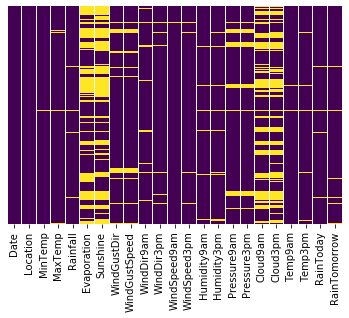

In [40]:
import seaborn as sns


sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### We see a lot of missing data points (almost half) for the columns 'Sunshine', 'Evaporation', 'Cloud3pm', and 'Cloud9am'. We will drop all of these columns.

In [41]:
data = data.drop(columns=["Sunshine", "Evaporation", "Cloud3pm", "Cloud9am"], axis=1)
data.count().sort_values()

Pressure9am      130395
Pressure3pm      130432
WindDir9am       134894
WindGustDir      135134
WindGustSpeed    135197
Humidity3pm      140953
WindDir3pm       141232
Temp3pm          141851
RainTomorrow     142193
Rainfall         142199
RainToday        142199
WindSpeed3pm     142398
Humidity9am      142806
Temp9am          143693
WindSpeed9am     143693
MinTemp          143975
MaxTemp          144199
Location         145460
Date             145460
dtype: int64

#### We see that some values of RainTomorrow and RainToday are missing, drop these values.

In [42]:
data = data.dropna(subset=['RainTomorrow', 'RainToday'])
data.count()

Date             140787
Location         140787
MinTemp          140319
MaxTemp          140480
Rainfall         140787
WindGustDir      131624
WindGustSpeed    131682
WindDir9am       131127
WindDir3pm       137117
WindSpeed9am     139732
WindSpeed3pm     138256
Humidity9am      139270
Humidity3pm      137286
Pressure9am      127044
Pressure3pm      127018
Temp9am          140131
Temp3pm          138163
RainToday        140787
RainTomorrow     140787
dtype: int64

In [43]:
numerical = [_ for _ in data.columns if data[_].dtypes != 'O']

### Cleaning Categorical Variables

In [44]:
data = pd.get_dummies(data, columns = ['RainTomorrow', 'RainToday'], drop_first=True)
data.rename(columns={'RainTomorrow_Yes': 'RainTomorrow',
                          'RainToday_Yes': 'RainToday'}, inplace=True)
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow,RainToday
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


#### Converting the date into years and months. Days don't seem as important/relevant

In [45]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data.drop('Date', axis=1, inplace = True)
data.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow,RainToday,Year,Month
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,2008,12
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,2008,12
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,2008,12
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,2008,12
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,2008,12


In [46]:
categorical = ['Location','WindGustDir', 'WindDir9am', 'WindDir3pm']
data[categorical].isnull().sum()

Location          0
WindGustDir    9163
WindDir9am     9660
WindDir3pm     3670
dtype: int64

#### There are a lot of missing categorical values. To solve for the missing values, we will take the mode (most frequently occuring category) and use those for the missing values.

In [47]:
def impute_numerical(columns):
    for column in columns:
        mode = data[column].mode()
        data[column].fillna(mode[0], inplace=True)     
impute_numerical(categorical)

data[categorical].isnull().sum()


Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
dtype: int64

#### Now lets encode categorical columns 'WindGustDir', 'WindDir9am' , 'WindDir3pm', 'Location' using one-hot encoding.

In [48]:
data = pd.get_dummies(data, columns = categorical, drop_first=True)
data.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,1,0,0,0,0,0,0,0,0


### Cleaning Numerical Variables

In [49]:
data[numerical].isnull().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Temp9am            656
Temp3pm           2624
dtype: int64

#### Similar to the categorical variables, we will fill in the missing numerical variables with the mean for that column.

In [50]:
def impute_column(columns):
    for column in columns:
        mean = data[column].mean()
        data[column].fillna(mean, inplace=True)     
impute_column(numerical)


In [51]:
data[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
dtype: int64

## Feature Selection

#### To select which features we will include in our model, we will look at the correlation matrix. From this matrix, we see that Humidity3pm is the best indicator. We will try 3 different sets of data. 

#### 1. Humidity3pm, RainToday
#### 2. Humidity3pm, RainToday, Humidity9am, Rainfall, Pressure9am
#### 3. All Features (except RainTomorrow)


In [52]:
corr_matrix = data.corr()
corr_matrix["RainTomorrow"].sort_values(ascending=False)

RainTomorrow        1.000000
Humidity3pm         0.441531
RainToday           0.313097
Humidity9am         0.256047
Rainfall            0.239032
                      ...   
Location_Woomera   -0.055010
MaxTemp            -0.159270
Temp3pm            -0.190700
Pressure3pm        -0.216805
Pressure9am        -0.235941
Name: RainTomorrow, Length: 109, dtype: float64

In [53]:
data_y = data["RainTomorrow"]

data_1_cols = ["Humidity3pm", "RainToday"]
data_1 = data[data_1_cols]
data_2_cols = ['Humidity3pm' , 
               'RainToday', 
               'Humidity9am', 
               'Rainfall', 
               'Pressure9am']
data_2 = data[data_2_cols]
data_3 = data.drop(columns=["RainTomorrow"])

original_data = [data_1, data_2, data_3]


### Train-Test Split

In [54]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=32)

train_y = train["RainTomorrow"]
train_1 = train[data_1_cols]
train_2 = train[data_2_cols]
train_3 = train.drop(columns=["RainTomorrow"])

test_y = test["RainTomorrow"]
test_1 = test[data_1_cols]
test_2 = test[data_2_cols]
test_3 = test.drop(columns=["RainTomorrow"])

train_array = [train_1, train_2, train_3]
test_array = [test_1, test_2, test_3]


### Data Regularization

#### We regularize the data before applying our models.

In [55]:
from sklearn.preprocessing import StandardScaler

process = StandardScaler()

for data_set in train_array:
    data_set = process.fit_transform(data_set)


## Models

### Logistic Regressions

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

count = 1
log_array = []

for i in range(len(train_array)):
    model_name = "log_reg{}".format(count)
    log_reg = LogisticRegression(multi_class="auto",solver="lbfgs", max_iter=10000)
    log_reg.fit(train_array[i], train_y)
    predicted = log_reg.predict(test_array[i])
    accuracy = accuracy_score(test_y, predicted)
    print("Logistic Reg {} accuracy is {}".format(count, accuracy))
    count += 1
    log_array.append((model_name, log_reg, predicted, accuracy))
    print(classification_report(test_y, predicted))

    

Logistic Reg 1 accuracy is 0.8302791391434051
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     22015
           1       0.69      0.40      0.51      6143

    accuracy                           0.83     28158
   macro avg       0.77      0.67      0.70     28158
weighted avg       0.82      0.83      0.81     28158

Logistic Reg 2 accuracy is 0.8339725832800625
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     22015
           1       0.71      0.40      0.51      6143

    accuracy                           0.83     28158
   macro avg       0.78      0.68      0.71     28158
weighted avg       0.82      0.83      0.82     28158

Logistic Reg 3 accuracy is 0.8499183180623624
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22015
           1       0.73      0.50      0.59      6143

    accuracy                           0.85 

### Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier

count = 1
tree_array = []


for i in range(len(train_array)):
    model_name = "tree_{}".format(count)
    tree = DecisionTreeClassifier(max_depth=5, criterion='gini')
    tree.fit(train_array[i], train_y)
    predicted = tree.predict(test_array[i])
    accuracy = accuracy_score(test_y, predicted)
    print("Decision Tree {} accuracy is {}".format(count, accuracy))
    count += 1
    tree_array.append((model_name, tree, predicted, accuracy))
    print(classification_report(test_y, predicted))


Decision Tree 1 accuracy is 0.8318062362383692
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     22015
           1       0.70      0.39      0.51      6143

    accuracy                           0.83     28158
   macro avg       0.78      0.67      0.70     28158
weighted avg       0.82      0.83      0.81     28158

Decision Tree 2 accuracy is 0.8359258470061794
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     22015
           1       0.71      0.42      0.53      6143

    accuracy                           0.84     28158
   macro avg       0.78      0.69      0.71     28158
weighted avg       0.82      0.84      0.82     28158

Decision Tree 3 accuracy is 0.840968818808154
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22015
           1       0.73      0.43      0.54      6143

    accuracy                           0.8

### Gradient Boosting Classification

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
learning_rate_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

# This function chooses the best learning rate by testing 
# the learning rates above on the model and returns the best one.
def get_learning_rate(train_x, train_y, test_x, test_y):
    best_rate = None
    max_accuracy = -float("inf")
    for learning_rate in learning_rate_list:
        gb_tree = GradientBoostingClassifier(
            n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=5, random_state=0, criterion='mse')
        gb_tree.fit(train_x, train_y)
        predicted = gb_tree.predict(test_x)
        accuracy = accuracy_score(test_y, predicted)
        
        if accuracy > max_accuracy:
            best_rate = learning_rate
            max_accuracy = accuracy
    return best_rate
    
count = 1
gb_array = []


for i in range(len(train_array)):
    model_name = "gb_{}".format(count)
    rate = get_learning_rate(
            train_array[i], train_y, test_array[i], test_y)
    gb_tree = GradientBoostingClassifier(
        n_estimators=20, learning_rate=rate, max_features=2, max_depth=5, random_state=0, criterion='mse')
    gb_tree.fit(train_array[i], train_y)
    predicted = gb_tree.predict(test_array[i])
    accuracy = accuracy_score(test_y, predicted)
    print("Gradient Boosted Classification {} accuracy is {}".format(count, accuracy))
    count += 1
    gb_array.append((model_name, gb_tree, predicted, accuracy))
    print(classification_report(test_y, predicted))



Gradient Boosted Classification 1 accuracy is 0.8318062362383692
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     22015
           1       0.70      0.39      0.51      6143

    accuracy                           0.83     28158
   macro avg       0.78      0.67      0.70     28158
weighted avg       0.82      0.83      0.81     28158

Gradient Boosted Classification 2 accuracy is 0.840080971659919
              precision    recall  f1-score   support

           0       0.85      0.97      0.90     22015
           1       0.76      0.39      0.52      6143

    accuracy                           0.84     28158
   macro avg       0.80      0.68      0.71     28158
weighted avg       0.83      0.84      0.82     28158

Gradient Boosted Classification 3 accuracy is 0.8419632076141771
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22015
           1       0.72      0.45      0.55

## Baseline

In [59]:
rain_tomorrow = data['RainTomorrow']
rain_tomorrow.value_counts()

0    109586
1     31201
Name: RainTomorrow, dtype: int64

#### Since 'No' it will not rain is more frequently seen than 'Yes', we will obtain the baseline by predicting only 'No'.

In [60]:
accurate = 0

for val in test_y:
    if val == 0:
        accurate += 1

print(accurate / len(test_y))

0.7818381987357057


#### It seems like all our models beat the baseline!

## Cross-Validation

#### Let's also test our models with cross-validation (k-folds). The 3rd data set type (selecting all features), takes a while so let's cross-validate using the 2nd data set type (features = Humidity3pm, RainToday, Humidity9am, Rainfall, Pressure9am). 

In [69]:
from sklearn.model_selection import cross_val_score

process = StandardScaler()


# Obtained from previous step
original_data = [data_1, data_2, data_3]

for data_set in original_data:
    data_set = process.fit_transform(data_set)

models = [log_array, tree_array, gb_array]

def cross_validate_model(models):
    for model in models:
        #print(model)
        trial = model[1]
        accuracy = cross_val_score(trial[1], original_data[1], data_y,
                scoring='accuracy', 
                cv=10)
        f_score = cross_val_score(trial[1], 
            original_data[1], data_y, scoring='f1_weighted', 
            cv=10)
        f_score = f_score.mean()
        mean = accuracy.mean()
        std = accuracy.std()

        print("Model: {}".format(trial[0]))
        print("Accuracy: {}".format(accuracy))
        print("Mean: {}".format(mean))
        print("Standard deviation: {}".format(std))
        print("F-score: {}".format(f_score))
        print()

cross_validate_model(models)

Model: log_reg2
Accuracy: [0.84105114 0.83031465 0.83883799 0.8181689  0.83024363 0.82548476
 0.83761898 0.8309419  0.82753232 0.84074442]
Mean: 0.8320938687867223
Standard deviation: 0.007052541354642666
F-score: 0.8131663113303119

Model: tree_2
Accuracy: [0.84147727 0.82853896 0.83443426 0.82278571 0.82981746 0.83102493
 0.83648245 0.83151016 0.82852678 0.84237818]
Mean: 0.8326976164521482
Standard deviation: 0.005775604402261495
F-score: 0.8132535892178379

Model: gb_2
Accuracy: [0.84183239 0.83258754 0.83322679 0.8276156  0.83663612 0.83748846
 0.8393948  0.83662452 0.8305157  0.84479329]
Mean: 0.8360715213859459
Standard deviation: 0.004955136595032467
F-score: 0.814905380546975



## Results

### Test-Train Split

#### We see for all the models that we ran that they have very similar accuracies and f-scores. We're able to achieve around an 84% accuracy for each model type (Logistic Regression, Decision Trees, and Gradient Boosting Classifier).

#### Additionally, for each type of model, we see that there is a trend with the different sets of data. Our model predictions become more accurate as we increase the number of features in the data set (1. Humidity3pm, RainToday, 2. Humidity3pm, RainToday, Humidity9am, Rainfall, Pressure9am, 3. All Features except RainTomorrow).

#### From this, we can make the conclusion that all these models are fairly good predictors and they all beat our baseline of 78% accuracy (just guessing that it won't rain tomorrow). Thus, the best model to use would be one that is slightly better than the other models and/or one that has a faster runtime, depending on what you value. 

#### Along the same lines, although the model predictions become more accurate as the number of features included increases, because there are so many features included, the runtime for creating and predicting the model becomes a lot slower. The second data set, (features Humidity3pm, RainToday, Humidity9am, Rainfall, Pressure9am) provide a good mix of performance as well as accuracy/good f-score.

### Cross-Validation
#### We see that the cross-validation accuracies and f-scores are very similar to those seen in the test-train split. This is because our data size was fairly large (compared to, for example, the abalone data set). The results from our test-train split hold.